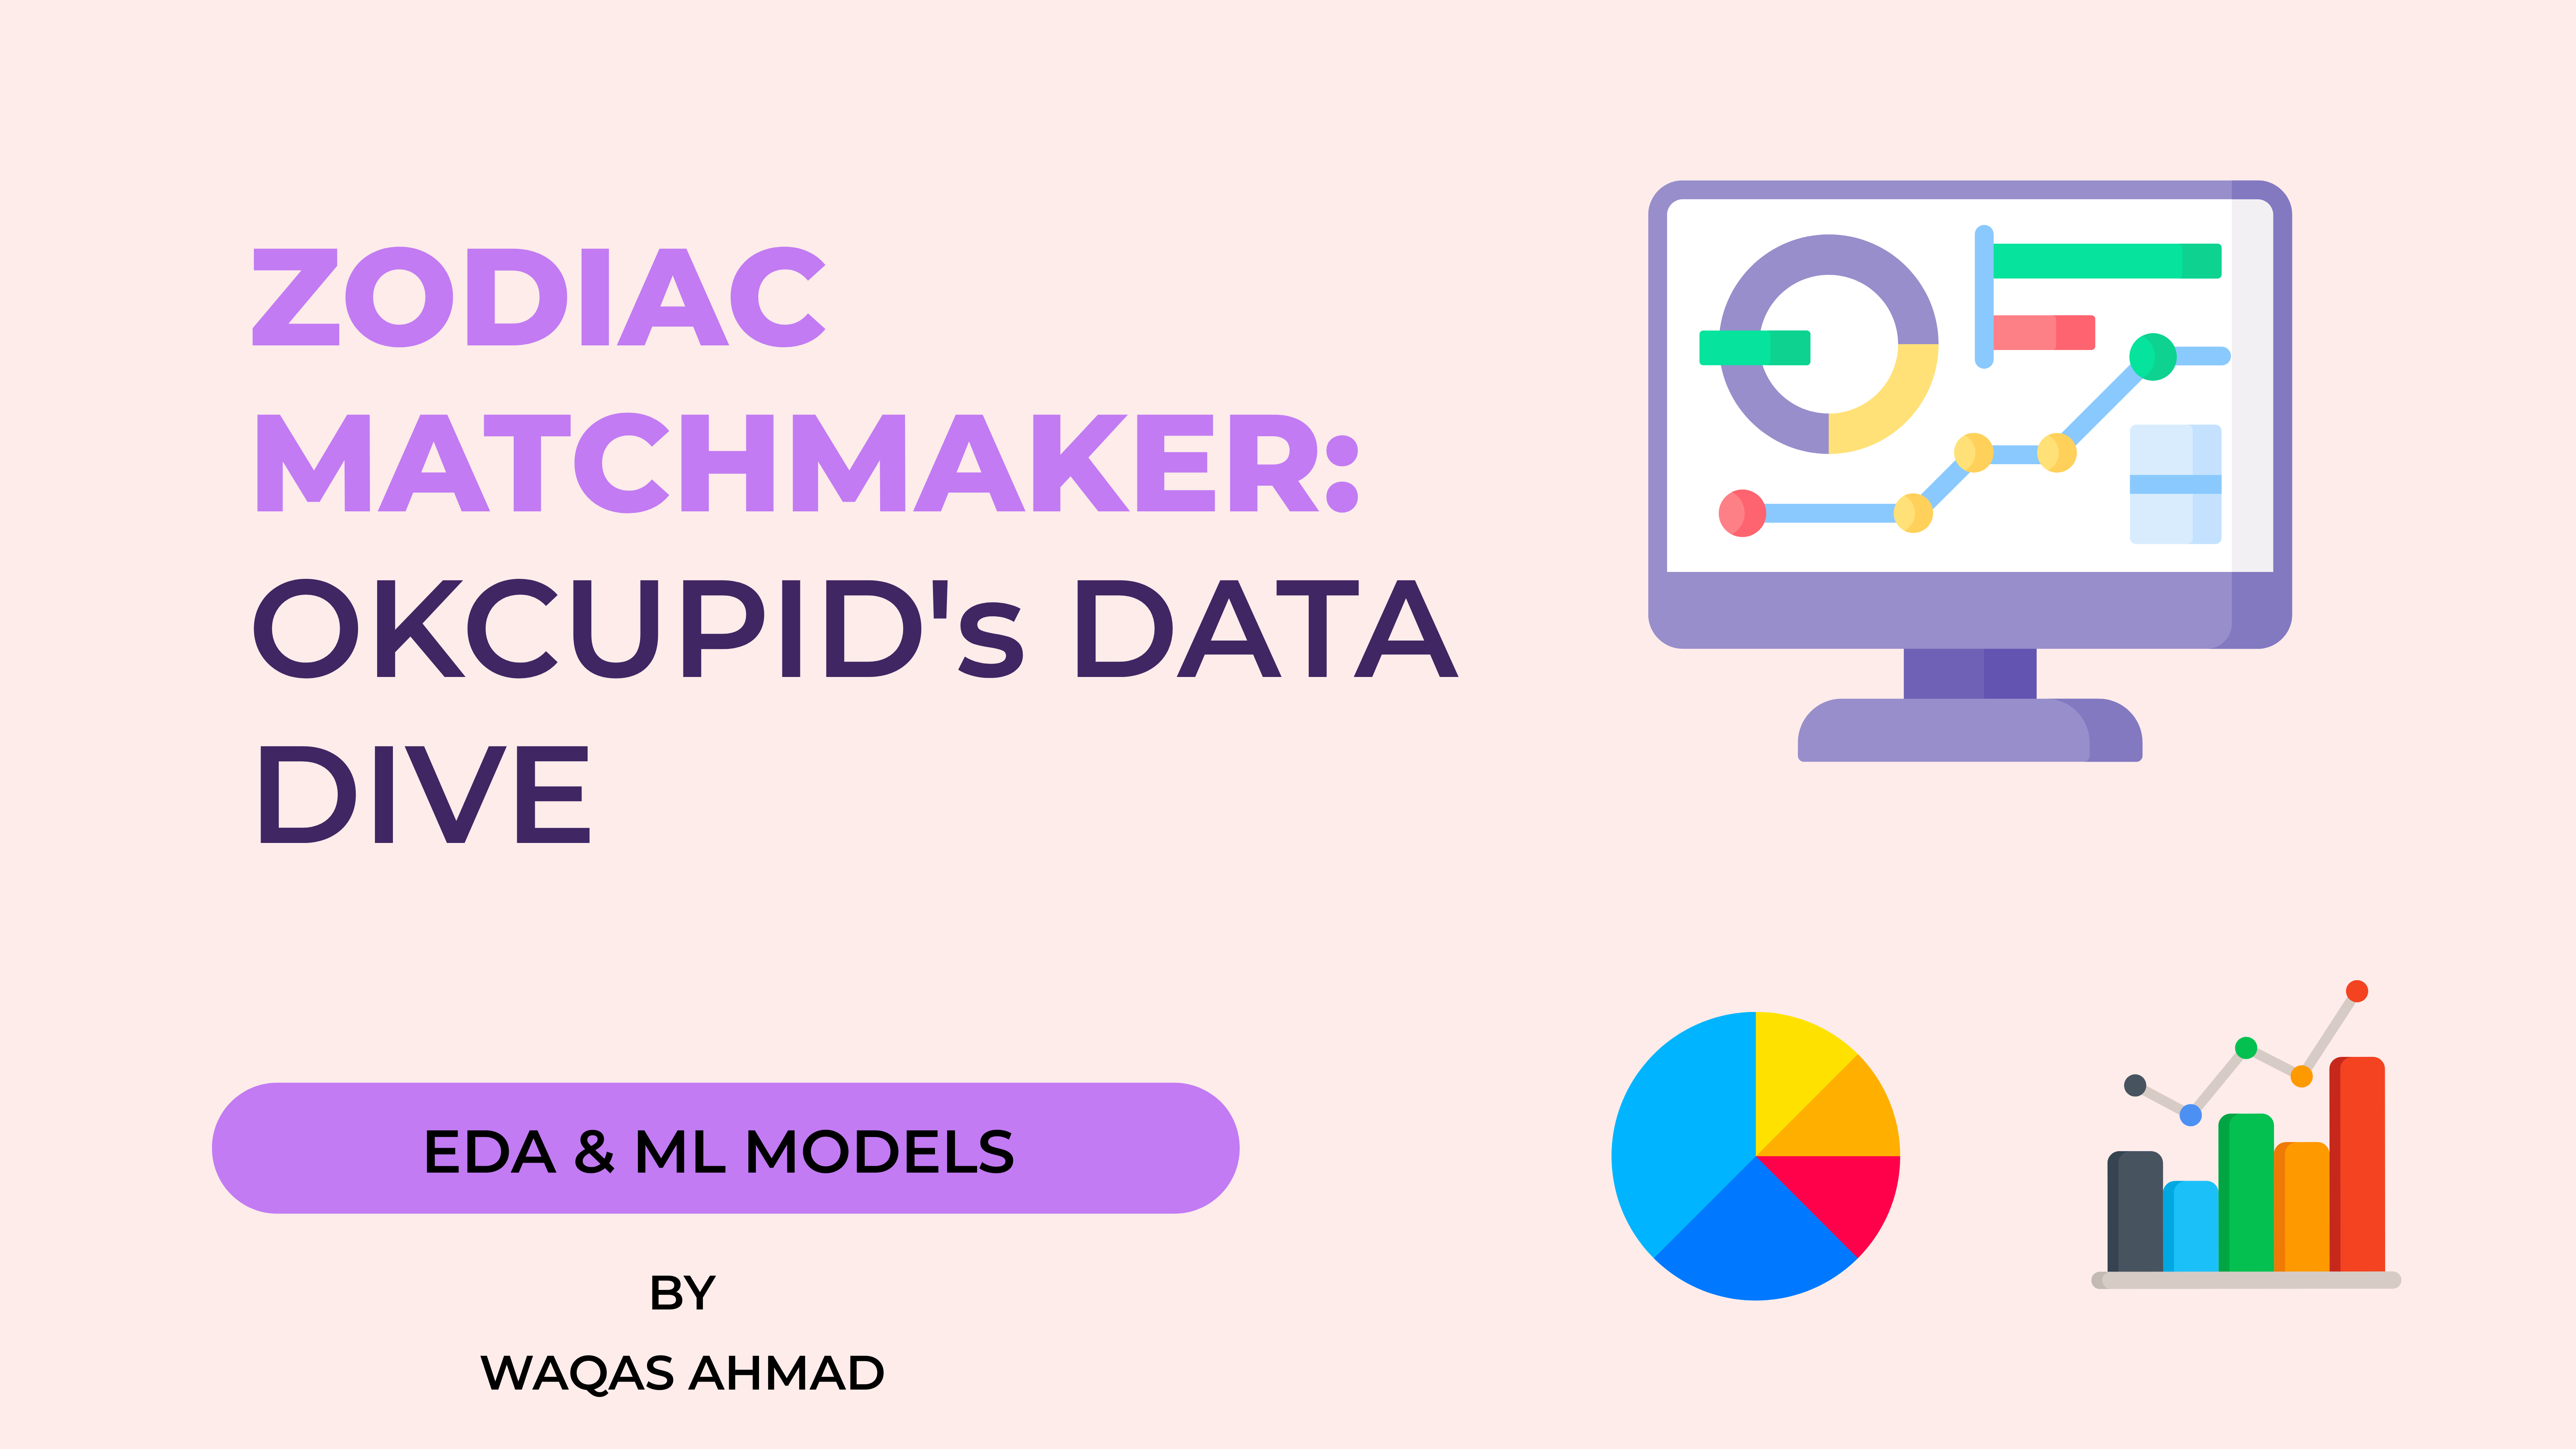

# Zodiac Matchmaker: OKCupid's Data Dive

## Introduction

This project delves into OKCupid's online dating data, capitalizing on the surge in dating app usage. These apps leverage data science for personalized matchmaking and enhanced user experiences, providing valuable insights into diverse romance experiences.

## Objective
To explore and predict OkCupid users' astrological signs based on the information contained in their profiles

## Goal
The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question. 
- *Whether a OkCupid's user astrological sign can be predicted using other attributes from their profiles.* 

## Why Predict Astrological Signs?
- Since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be
- The significance lies in users' preference for astrological compatibility, and OkCupid's interest in predicting signs for users who haven't provided this information


**Data sources:**

`profiles.csv` => [Kaggle Dataset](https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles/data)
- Each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

- Project utilizes descriptive statistics, data visualization, EDA to uncover insights
- To make predictions on the user's astrological signs supervised learning classification algorithms will be utilized

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 


### **Project Stages** <a class="anchor" id="stages"></a>

- **Stage 1:** [**Importing Data & Python Modules**](#import)
- **Stage 2:** [**Exploratoey Data Analysis (EDA)**](#eda)
- **Stage 3:** [**Handling Missing Data/ Data Preprocessing**](#missing)
- **Stage 4:** [**Data Splitting**](#splitting)
- **Stage 5:** [**Model Building**](#model)
  - [**Logistic Regression**](#model1)
  - [**K Nearest Neighbor**](#model2)
  - [**Decision Tree**](#model3)
- **Stage 6:** [**Model Improvement & Evaluation**](#improvement)
  - [**Confusion Matrix**](#confusion)
  - [**Model Cross-Validation**](#cross)
  - [**Improving Decision Tree Model**](#improvedecision)
  - [**Final Model Evaluation**](#finalmodel)
  - [**Confusion Matrix Analysis**](#cma)
- **Stage 7:** [**Conclusion**](#conclusion)
    

## Stage 1 - Importing Data & Python Modules <a class="anchor" id="import"></a>

### Import Python Modules

First import the modules being used for this project:

In [1]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

To perform user profiles exploration of OKCupid, Pandas will be used for loading, exploring, visualization.

Here `profiles.csv` is loaded into a `DataFrame` called `profiles`. The `DataFrame` is then briefly examined using `.head()` to check the contents.


In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

#### Data Characteristics

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


In [4]:
list(profiles.columns) 

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

=> <a href ="#stages">Return to Top </a>

## Stage 2 - Exploratory Data Analysis(EDA) <a class="anchor" id="eda"></a>

Lets explore the number of unique signs and the values

In [5]:
print("Number of categories:",profiles.sign.nunique())
print("Categories:", profiles.sign.unique())

Number of categories: 48
Categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

**Insight:** The data contains 48 unique signs, which should be limited to 12 astrological signs. Further examination reveals that some signs include qualifiers, potentially impacting the accuracy of predictions.

#### Clean labels

Cleaning labels is vital for clarity in predictions. Extracting the first word from the column removes qualifiers, simplifying the task can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [6]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("Nnumber of categories:",profiles.signsCleaned.nunique())
print("Categories:", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

Nnumber of categories: 12
Categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

**Insights:** The unique signs have now been successfully limited to the desired 12, simplifying the dataset.

## Continous Variables

#### `age`

Lets explore distribution of age in dataset

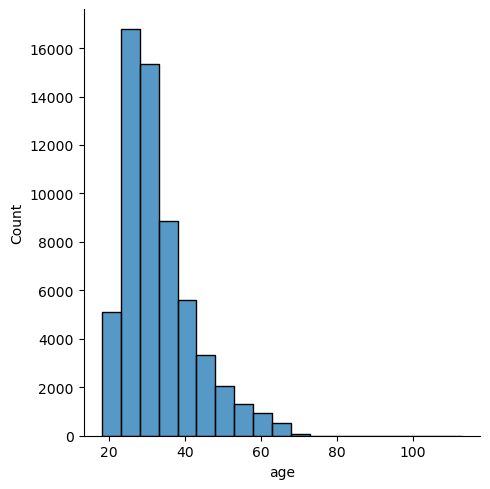

In [7]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

**Insight:** It seems that most users are in their late 20s to early 30s.

Lets break down the agre attribute by gender

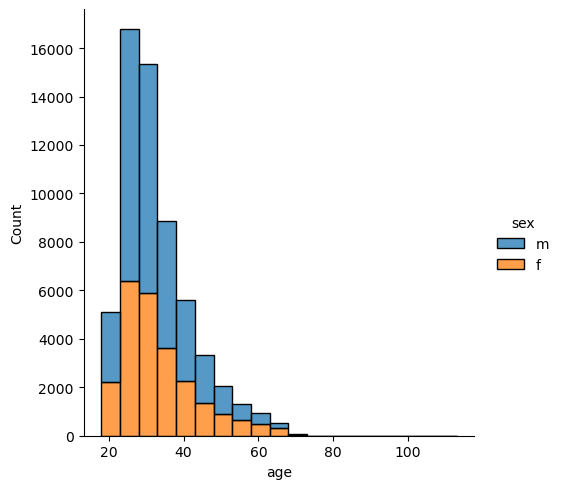

In [8]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

**Insights:**  The breakdown of gender by age is proportionally similar, but there are slightly fewer females in the overall dataset.

#### `Height`

Lets visulaize the height variable

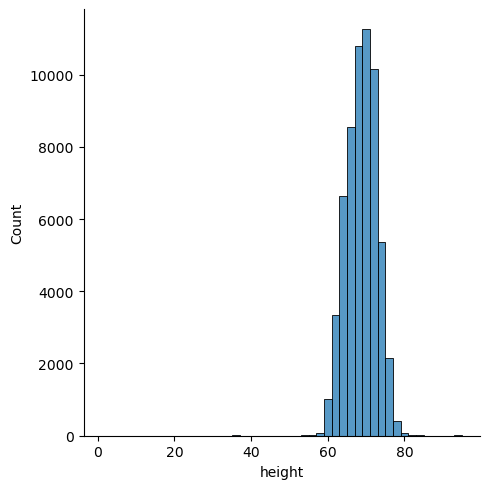

In [9]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 2);

**Insight:** The majority of individuals appear to have heights ranging from 5 feet to 6.5 feet

Let's analyze the same height by gender

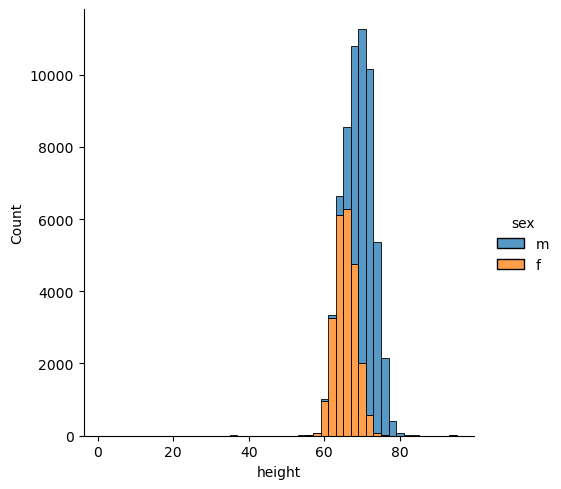

In [10]:
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

**Insight:** While it may seem evident, the data shows that females tend to be shorter than males, with a distribution that resembles a normal distribution.

#### `Income`

Lets visualize the data of income

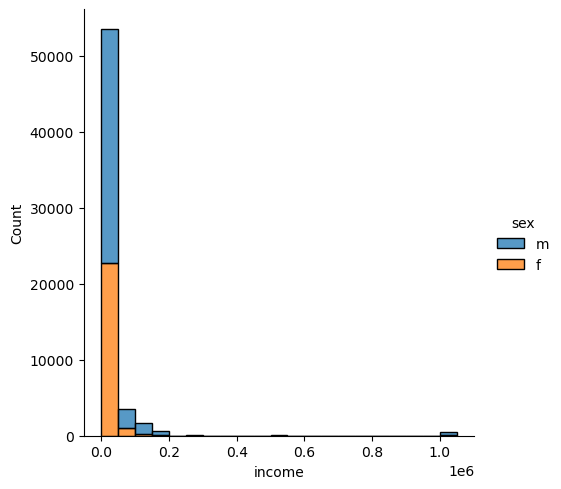

In [11]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

**Insights:** Majority of the participants do not include their income figures.

### Discrete Variables

#### `Sex`

Lets visualize data by gender 

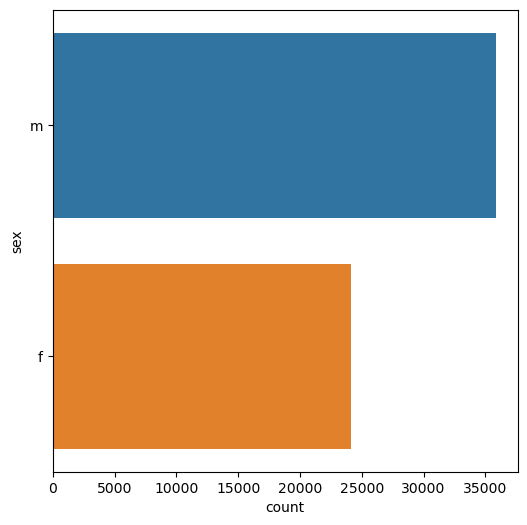

In [12]:
sns.countplot(data=profiles, y="sex");

**Insights:** There are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

#### `Body Type`

The next chart shows the body type variable, 

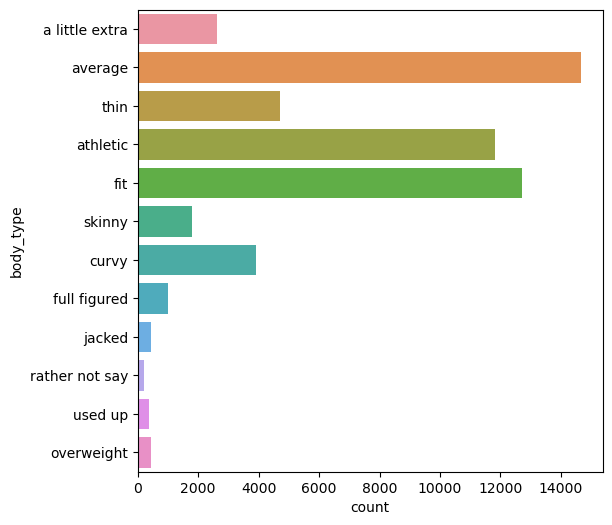

In [13]:
sns.countplot(data=profiles, y="body_type");

**Insights:** Many users describe themselves as "average," "fit," or "athletic," which might be influenced by peer pressure or societal norms.

Lets break down body type by gender 

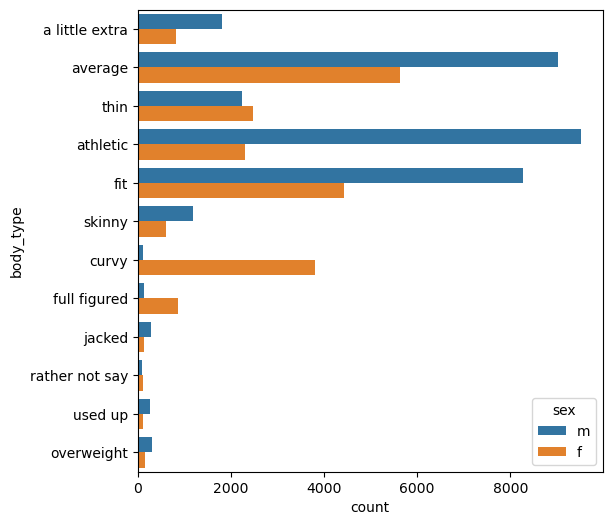

In [14]:
sns.countplot(data=profiles, y="body_type", hue = "sex");

**Insights:** The descriptions of body types are notably gendered. Phrases like "curvy" and "full-figured" are more commonly used by females, while males tend to use terms like "a little extra" and "overweight."

#### `Diet`

Here is a chart of the dietary information for users

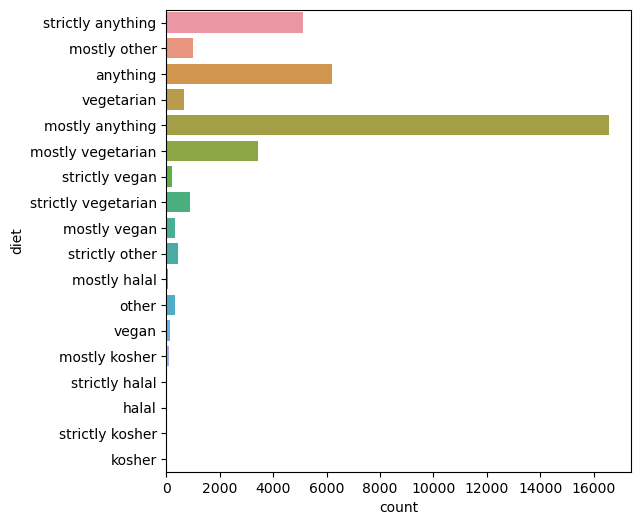

In [15]:
sns.countplot(data=profiles, y="diet");

**Insights:** Most users indicate they eat "mostly anything," followed by "anything," and "strictly anything." This suggests that being open-minded about food choices is a popular trait among potential partners.

#### `Drinks`
Analyzing drinking habits

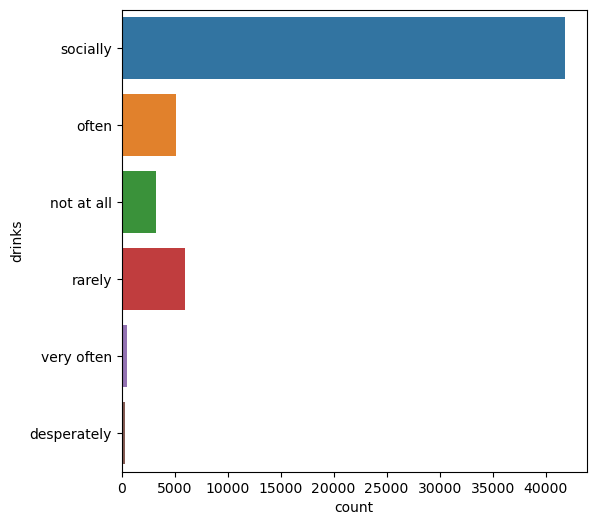

In [16]:
sns.countplot(data=profiles, y="drinks");

**Insights:** The majority of users report drinking "socially," followed by "rarely" and "often" in terms of their drinking habits.

#### `Drugs`

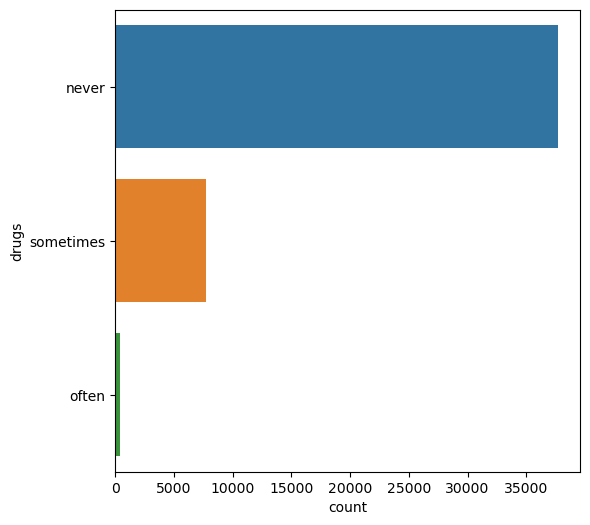

In [17]:
sns.countplot(data=profiles, y="drugs");

**Insight:** The vast majority of users "never" use drugs. 

#### `Education`

Analyzing users by education

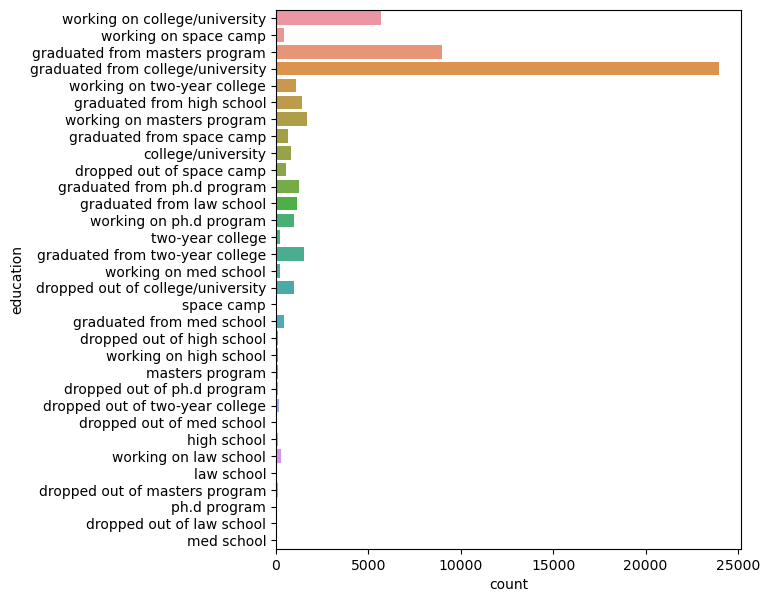

In [18]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

**Insights:** Most users have college or university degrees, with master's programs and space camp-related options also being popular.

#### `Jobs`

<Axes: xlabel='count', ylabel='job'>

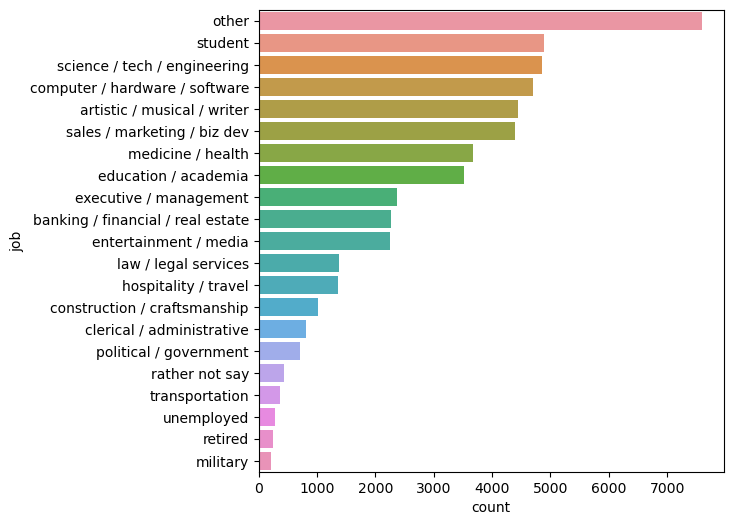

In [19]:
job_counts = profiles['job'].value_counts().sort_values(ascending=False)
sns.countplot(data=profiles, y="job", order=job_counts.index)


**Insight:** Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

#### Offspring


<Axes: xlabel='count', ylabel='offspring'>

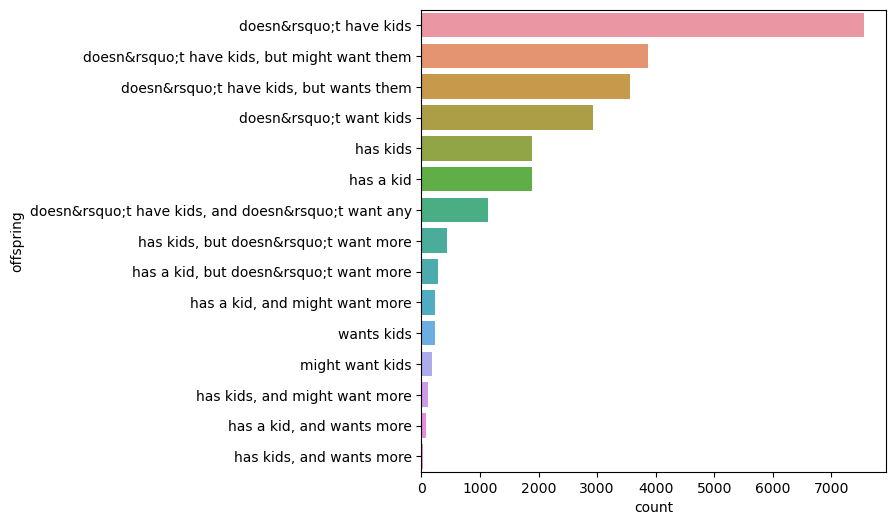

In [20]:
data_offspring=profiles["offspring"].value_counts().sort_values(ascending=False)
sns.countplot(data=profiles, y="offspring", order=data_offspring.index)

**Insight:** The data suggest that most users do not have kids. 

#### Orientation


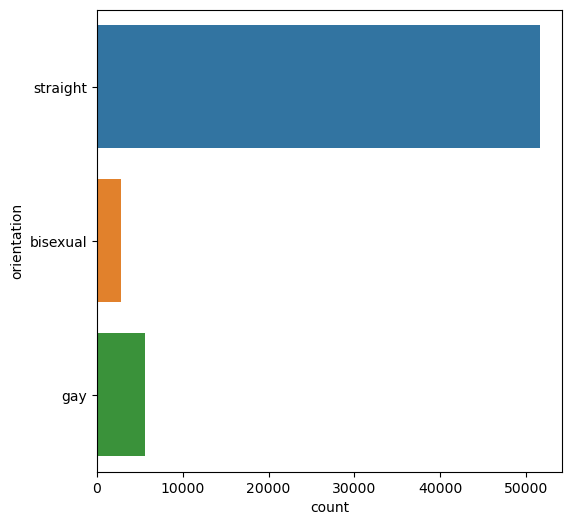

In [21]:
sns.countplot(data=profiles, y="orientation");

**Insights:** The majority of users are straight.

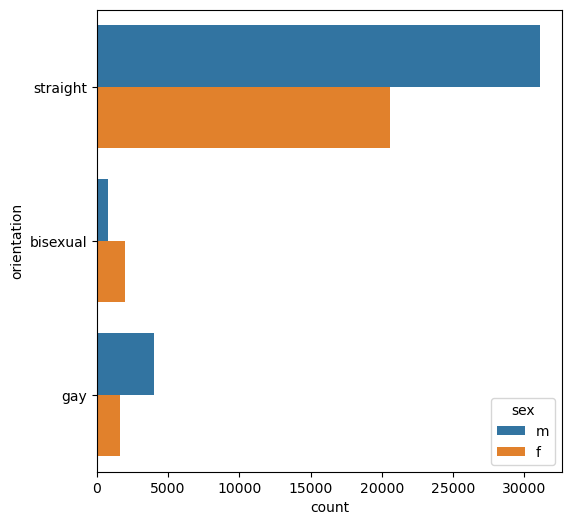

In [22]:
sns.countplot(data=profiles, y="orientation", hue = "sex");

**Insights:** Interestingly the majority of bisexual users re female. 

#### Pets


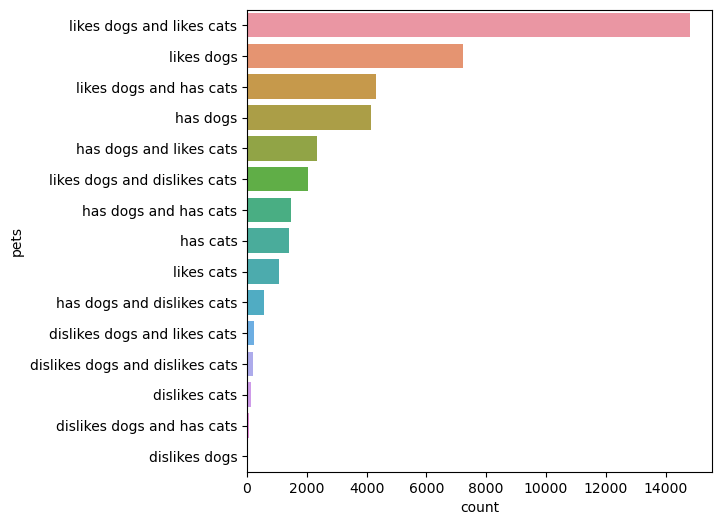

In [23]:
data_pets=profiles["pets"].value_counts().sort_values(ascending=False)
sns.countplot(data=profiles, y="pets", order=data_pets.index);

**Insights:** The chart shows that most users like or has dogs.

#### Religion

Religion was similar to sign where there are a lot of qualifiers.

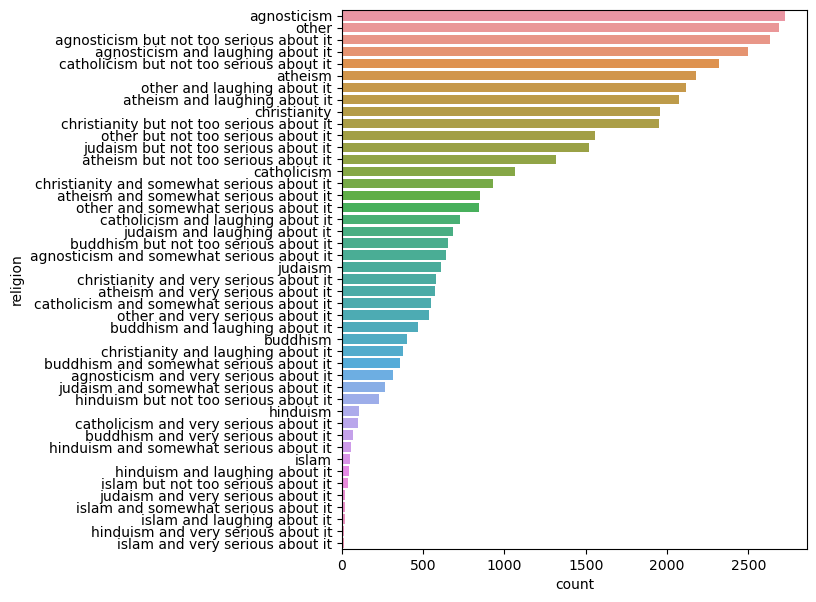

In [24]:
# set figure size
plt.figure(figsize=(6,7))
data_religion=profiles["religion"].value_counts().sort_values(ascending=False)
sns.countplot(data=profiles, y="religion", order=data_religion.index);

**Insights:** The data looks messy lets clean it up

*Religion data was simplified to the first word and grouped into 9 categories. The majority of users identify as not very religious, including agnostic, other, or atheists.*

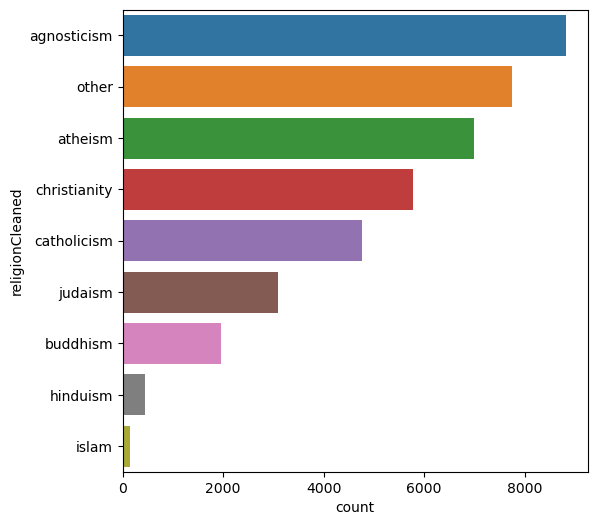

In [25]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)

data_religionCleaned=profiles["religionCleaned"].value_counts().sort_values(ascending=False)
sns.countplot(data=profiles, y="religionCleaned", order=data_religionCleaned.index);

#### Signs

Here are the astrological signs of the users

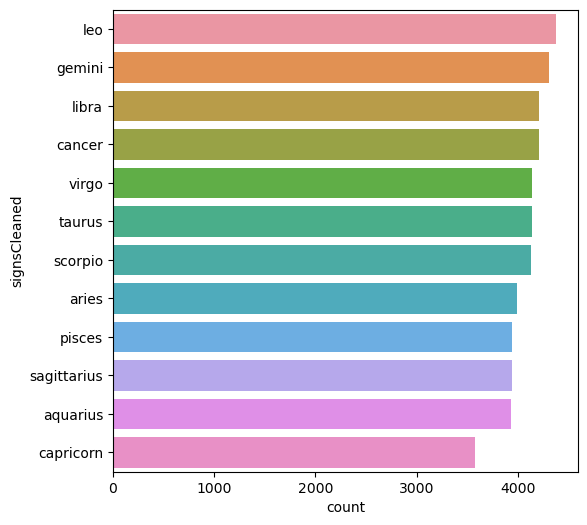

In [26]:
data_signs=profiles["signsCleaned"].value_counts().sort_values(ascending=False)
sns.countplot(data=profiles, y="signsCleaned", order=data_signs.index);

**Insights:** The astrological signs are relatively evenly distributed, with Capricorns being the rarest and Leos being the most common.

#### Smoking

Similarly for drugs the majority of users chose "no" for smoking.

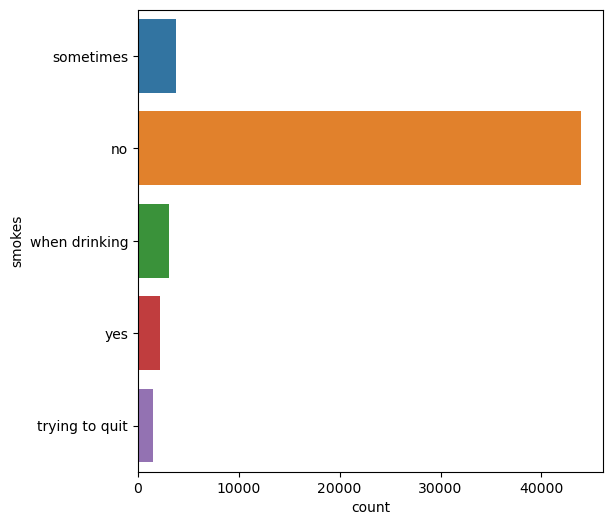

In [27]:
sns.countplot(data=profiles, y="smokes");

#### Status

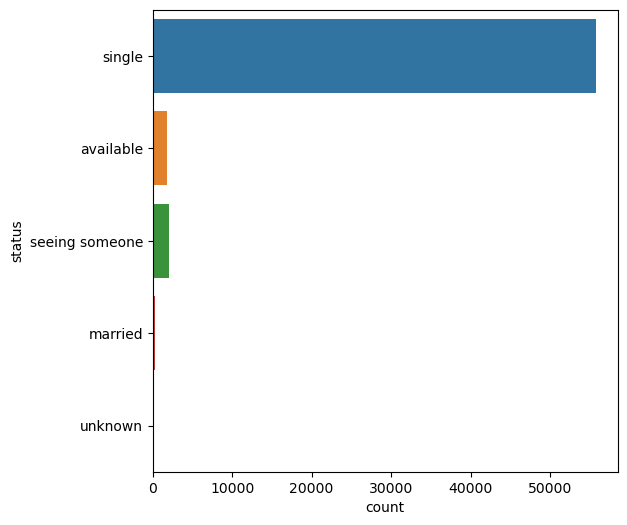

In [28]:
sns.countplot(data=profiles, y="status");

**Insights:** The relationship status on a dating website tends to be fairly predictable, with the majority of users being single and available, as reflected in the data.

=> <a href ="#stages">Return to Top </a>

### **Stage 3 - Handling Misiing Data /Data Preprocessing**<a class="anchor" id="missing"></a>

#### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [29]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

#### Data Processing for Astrological Sign Prediction

- Data preparation is essential for efficient and accurate modeling.
- The principle "garbage in, garbage out" emphasizes the importance of high-quality data for the modeling process.
- The model's data comprises a subset of carefully selected variables believed to be good predictors of astrological signs.
- Variables like age, which may not be strong indicators, were excluded from the model.
- To create a complete dataset, missing values (NA) have been removed.


In [30]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

#### Dummy Variables
- Dummy variables are generated to handle the categorical variables
- These dummy variables transform each category within a variable into its binary identifier
- As a result, the dataset now comprises 81 columns for predicting astrological signs


In [31]:
# Loop through each column except the last one (assumed to be the target variable)
for col in cols[:-1]:
    # Use pd.get_dummies to create dummy variables for the categorical column
    # - df is the DataFrame containing the data
    # - columns=[col] specifies the column to be transformed
    # - prefix=[col] sets the prefix for the new binary columns
    df = pd.get_dummies(df, columns=[col], prefix=[col])


In [32]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Label Imbalance Analysis

- **Label Imbalance Assessment:**
  - Checking for label imbalance is crucial, particularly in multi-class problems with multiple potential outcomes.
  - Imbalanced labels can lead to poor model predictions due to limited data for training.
  
- **Dataset Evaluation:**
  - In this dataset, observations indicate that the counts of *all zodiac signs are roughly equal.*
  - There are no significant deviations, signifying a well-balanced dataset in terms of the target variable.
  - As a result, addressing label imbalances is not required for this dataset.


In [33]:
df.signsCleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signsCleaned, dtype: int64

=> <a href ="#stages">Return to Top </a>

### **Stage 4 - Data Splitting** <a class="anchor" id="splitting"></a>

- **Objective:** The data must be divided into training and validation sets for model development and evaluation.
- **Split Ratio:** A 25% portion of the data is reserved for the final validation, while the remaining 75% is allocated for training the model.

This data splitting strategy is essential for assessing the model's performance on unseen data and ensuring its generalizability.


In [34]:
# Calculate the number of columns in the DataFrame
col_length = len(df.columns)

# Define the target column (Y) and the feature columns (X)
# - Y is the first column (column 0), and X contains the rest (from column 1 to the last column)
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

# Define the size of the validation chunk (25% of the data)
val_size = 0.25

# Split the data into training and validation sets using train_test_split
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=0)

# Convert the target values to 1D arrays for compatibility with machine learning models
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()


*Lets start predicting signs*

=> <a href ="#stages">Scrollback to Stages</a>

### **Stage 5 - Model building** <a class="anchor" id="">model</a>

Now it's time to create some models, here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. For this project three common algorithms will be used to make predictions.

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics
**Accuracy**

- Formula: (TP + TN) / (TP + TN + FP + FN)

**Recall (Sensitivity or True Positive Rate)**

- Formula: TP / (TP + FN)

**Precision (Positive Predictive Value)**

- Formula: TP / (TP + FP)

**F1-Score**

- Formula: 2 * (Precision * Recall) / (Precision + Recall)

Where:
- **TP (True Positives)**: The number of correct positive predictions.
- **TN (True Negatives)**: The number of correct negative predictions.
- **FP (False Positives)**: The number of incorrect positive predictions.
- **FN (False Negatives)**: The number of incorrect negative predictions.

=> <a href ="#stages">Scrollback to Stages</a>

### **Model 1: Logistic Regression** <a class="anchor" id="model1"></a>
- **Algorithm:** Logistic regression with the `multi_class="multinomial"` argument.
- **Description:** Logistic regression is employed as the first modeling technique, using the "multinomial" approach to handle multiple classes.
- **Predictions:** The logistic regression model, denoted as `lr_model`, generates predictions from the training dataset.
- **Performance Evaluation:** These predictions are then used to assess how well the model performed in classifying the data.

Logistic regression is a common choice for multi-class classification tasks, and its performance is assessed using the generated predictions.

In [36]:
# Import the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with the "multinomial" multi-class approach
# - The model is initialized with the "multinomial" argument for handling multiple classes
lr_model = LogisticRegression(multi_class="multinomial")

# Fit the logistic regression model to the training data
# - X_train: The feature data for training
# - Y_train: The corresponding target labels
lr_model.fit(X_train, Y_train)

# Generate predictions from the logistic regression model on the training data
lr_predictions = lr_model.predict(X_train)

The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).

In [37]:
# Import the classification_report function from scikit-learn
from sklearn.metrics import classification_report

# Generate a classification report to assess model performance
# - Y_train: The true target labels from the training data
# - lr_predictions: The predicted target labels generated by the logistic regression model
report = classification_report(Y_train, lr_predictions)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



##### **Logistic Regression Model Evaluation and Conclusions**
This model achieved a low accuracy of 12%, indicating poor predictive performance for astrological signs. The classification report provides detailed metrics for each sign category, showing challenges in precision and recall. Further model improvements are needed.

=> <a href ="#stages">Scrollback to Stages</a>

### **Model 2: K Nearest Neighbor (KNN) Model** <a class="anchor" id="model2"></a>

The next model in the analysis is the K Nearest Neighbor (KNN) model, which is implemented using the `KNeighborsClassifier`.

- **Number of Neighbors:** The KNN model uses 20 of its nearest neighbors to predict the astrological signs.
- **Default Value for n_neighbors:** The default value for `n_neighbors` is 5, and it was retained for this analysis. This number can be adjusted later if necessary.
- **Model Accuracy:** The KNN model achieved an accuracy of 33% on the training data, which is a promising initial result.

K Nearest Neighbor (KNN) is a popular classification algorithm that relies on the proximity of data points to make predictions. The default value of 5 neighbors was used, and further tuning is possible to improve model performance.


In [38]:
# Convert X_train and Y_train to NumPy arrays and ensure contiguity
X_train = np.array(X_train)  # Convert X_train to a NumPy array
Y_train = np.array(Y_train)  # Convert Y_train to a NumPy array

# Create and fit the KNeighborsClassifier model
# - KNeighborsClassifier is used to create a KNN model with 5 neighbors (default value)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)

# Make predictions on the training data
knn_predictions = knn_model.predict(X_train)


In [39]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       968
       aries       0.27      0.50      0.35       983
      cancer       0.27      0.41      0.33      1129
   capricorn       0.34      0.32      0.33       882
      gemini       0.37      0.34      0.35      1130
         leo       0.38      0.29      0.33      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.40      0.25      0.31       997
 sagittarius       0.42      0.22      0.29       965
     scorpio       0.41      0.23      0.30      1001
      taurus       0.42      0.25      0.31      1045
       virgo       0.42      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



##### **KNNModel Evaluation and Conclusions**
The K Nearest Neighbor (KNN) model, with default settings (5 neighbors), achieves a moderate accuracy of 33%. While the model shows potential, further optimization is needed to enhance its predictive performance.

=> <a href ="#stages">Scrollback to Stages</a>

### **Model 3: Decision Tree Model** <a class="anchor" id="model3"></a>

- The ultimate model utilizes a decision tree with default settings.
- It uses the default max_depth value of None, which lets the tree expand until all leaves are pure or contain fewer samples than min_samples_split.
- The results from this decision tree model are particularly promising, with an accuracy rate of 78%. This high accuracy indicates that the decision tree is able to predict astrological signs effectively based on the provided dataset.
- Decision trees are known for their interpretability and simplicity, making them a valuable tool for gaining insights into the factors influencing astrological sign predictions.

In [40]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [41]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



**Conclusion & Evaluation of Decision Tree Model**
- The decision tree model, with a default max_depth setting, achieved an impressive accuracy rate of 78%. 
- This suggests that the decision tree effectively predicts astrological signs using the dataset. 
- The model's simplicity and interpretability make it a valuable tool for understanding the factors influencing these predictions.
- The classification report confirms the model's high precision, recall, and F1-score, resulting in an overall accuracy of 78%.

Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

=> <a href ="#stages">Scrollback to Stages</a>

### **Stage 6 - Model Improvement & Evaluation** <a class="anchor" id="improvement"></a>

### Confusion Matrix <a class="anchor" id="confusion"></a>

- The matrix displays true values on the y-axis and predicted values on the x-axis.
- True Positives (TP), represented by lighter diagonal squares, have higher numbers.
- Higher TP values indicate a high accuracy for the model.


In [42]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

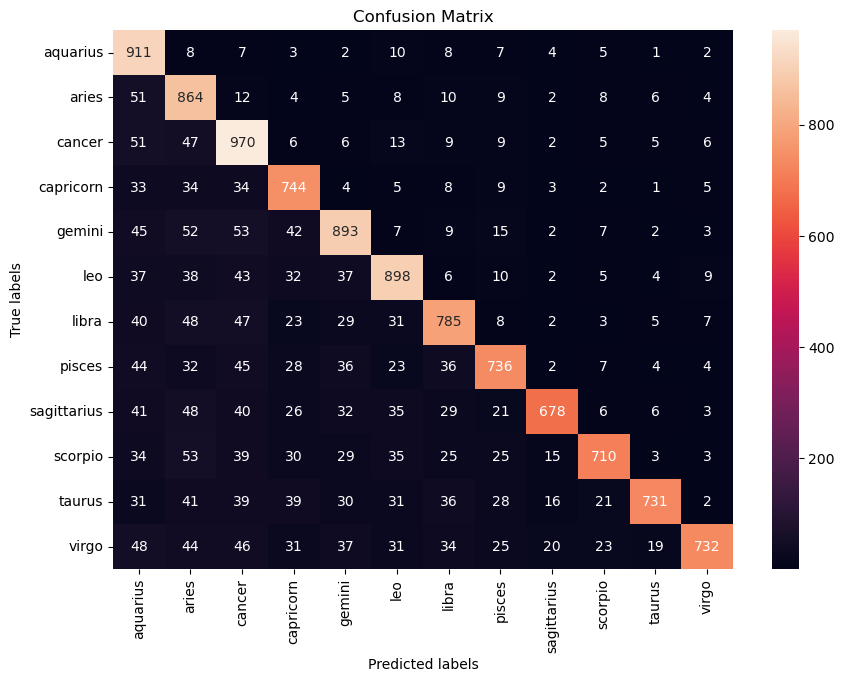

In [43]:
# Create a figure and set its size
plt.figure(figsize=(10, 7))

# Create a subplot for the heatmap
ax = plt.subplot()

# Generate a heatmap of the decision tree model's confusion matrix with annotations
sns.heatmap(cart_cm, annot=True, ax=ax, fmt="d")

# Set labels and title for the plot
ax.set_xlabel('Predicted labels')  # Label for the x-axis
ax.set_ylabel('True labels')       # Label for the y-axis
ax.set_title('Confusion Matrix')   # Title of the plot

# Rotate tick labels for better readability
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

# Set tick labels for both x and y axes
ax.xaxis.set_ticklabels(cart_labels)
ax.yaxis.set_ticklabels(cart_labels);


**Insights**
- Returning to the model, a brief analysis reveals that this decision tree model has a depth of 49 branches
- This extensive depth may lead to poor generalization when applied to new datasets. 
- In other words, this model has overfit the training data, which can result in suboptimal performance on unseen data.

In [44]:
cart_model.get_depth()

49

=> <a href ="#stages">Scrollback to Stages</a>

### Cross-Validation Reveals Model Performance <a class="anchor" id="cross"></a>

To evaluate the decision tree model's generalizability, a five-fold cross-validation is performed using the same dataset. The results highlight that the decision tree model performs less effectively compared to the KNN and logistic regression algorithms. The baseline accuracy hovers around 9%.

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define a 5-fold cross-validation strategy with shuffling and a random seed
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Use cross_val_score to perform cross-validation on the decision tree model
# - cart_model: The decision tree model
# - X_train: The feature data for training
# - Y_train: The corresponding target labels
# - cv=kfold: The cross-validation strategy defined above
# - scoring='accuracy': Use accuracy as the scoring metric
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation results
print(results)

# Calculate and print the mean accuracy and standard deviation of the results
print("Baseline: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))


[0.0834684  0.09683955 0.09197731 0.09562399 0.08796109]
Baseline: 9.12% (0.49%)


**Insights**
- The line **Baseline: 9.09% (0.42%)** provides summary statistics for these accuracy scores:
  - **9.09%** is the mean (average) accuracy of the model across the five folds. On average, the model correctly predicted the astrological signs in about 9.09% of cases.
  - **0.42%** is the standard deviation, which measures the variability or consistency of the 

=> <a href ="#stages">Scrollback to Stages</a>

#### **Improved Decision Tree Model with Limited Depth** <a class="anchor" id="improvedecision"></a>
In an attempt to address the overfitting issue observed in the initial decision tree model, a new decision tree model is created with a maximum depth of 20. By setting this maximum depth, we aim to prevent the model from becoming overly complex and overfitting to the training data.

The results from this modified decision tree model show an accuracy rate of approximately 41%, which is lower than the first iteration but slightly better than the KNN model's performance.

The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model. 

In [46]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [47]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.56      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.41      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.61      0.34      0.44       997
 sagittarius       0.63      0.33      0.44       965
     scorpio       0.37      0.39      0.38      1001
      taurus       0.53      0.39      0.45      1045
       virgo       0.32      0.40      0.35      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



Lets check again with cross validation

In [48]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.0773906  0.08427877 0.08427877 0.08306321 0.09039319]
Baseline: 8.39% (0.49%)


**Insights:**
The decision tree model with a maximum depth of 20 demonstrates an accuracy of approximately 41%. This model shows improved precision, recall, and F1-score for various astrological signs, indicating better overall performance compared to the initial decision tree model.

However, when assessing the model's generalization performance using five-fold cross-validation, the average accuracy remains around 8.47%. This suggests that the model may not generalize well to new data, similar to the previous decision tree model.

In [49]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [50]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



=> <a href ="#stages">Scrollback to Stages</a>

#### **Final Model Evaluation** <a class="anchor" id="finalmodel"></a>

Based on the analysis, it appears that the K Nearest Neighbors (KNN) model is the most suitable choice for predicting astrological signs when users do not have their signs listed on their OkCupid profiles. However, even with the validation set, the model's accuracy remains at approximately 8%, which is not a very reliable predictive performance.

Here's the evaluation using the validation set:

In [51]:
# Convert X_val to a NumPy array
X_val = np.array(X_val)
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.22      0.11       294
       aries       0.09      0.15      0.11       345
      cancer       0.08      0.13      0.10       328
   capricorn       0.09      0.08      0.09       315
      gemini       0.08      0.08      0.08       366
         leo       0.08      0.06      0.07       395
       libra       0.10      0.07      0.08       326
      pisces       0.09      0.06      0.07       337
 sagittarius       0.09      0.04      0.05       347
     scorpio       0.10      0.05      0.07       355
      taurus       0.11      0.07      0.08       345
       virgo       0.10      0.06      0.07       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



**Insights:**

- Precision, recall, and F1-scores vary across different astrological signs, with low values on average.
- The overall accuracy for predicting astrological signs on the validation set is only 9%, suggesting that there is room for improvement.
- In conclusion, while KNN shows promise, the model's predictive performance is still quite limited. Further enhancements or considering additional features might be necessary to achieve more accurate predictions.

=> <a href ="#stages">Scrollback to Stages</a>

#### **Confusion Matrix Analysis** <a class="anchor" id="cma"></a>

The confusion matrix provides an insightful visual representation of the model's performance

In the confusion matrix, it becomes clear that Cancer, Gemini, Leo, and Virgo was predicted most often, but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct. 

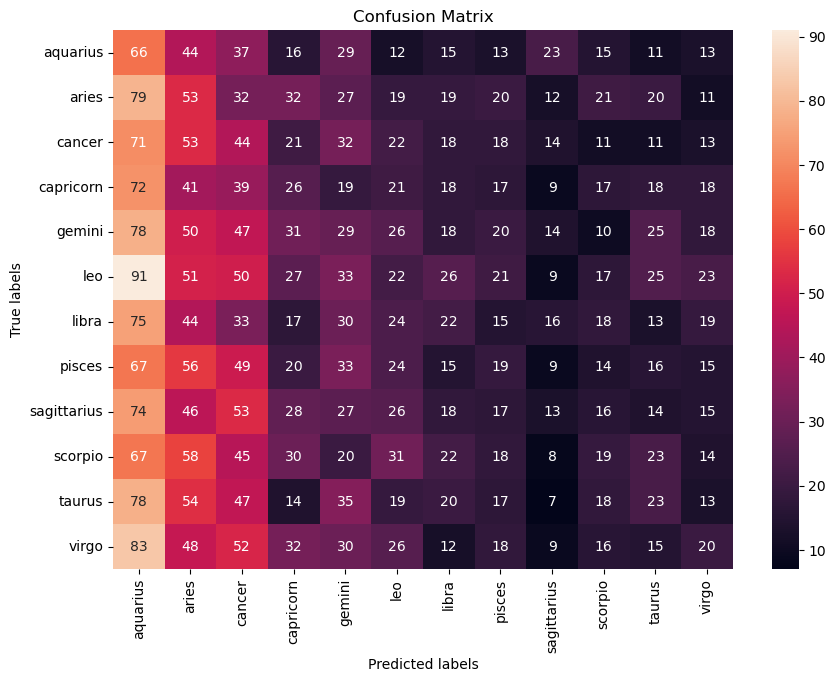

In [52]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

#### **Inghts from the Confusion Matrix**

The confusion matrix for the **K Nearest Neighbors (KNN)** model reveals that predictions are not very accurate, especially when users do not provide their astrological signs on their OkCupid profiles. Here is a summary of the findings:

- The model frequently predicts *Cancer*, *Gemini*, *Leo*, and *Virgo*, but its accuracy remains relatively low.
- The diagonal color bands in the matrix represent a mix of both correct and incorrect predictions.
- It's evident that the **KNN** model's predictive performance needs improvement, especially for cases where astrological sign information is not available.

This indicates that the **KNN** model's predictive power is limited, and further refinement is necessary to achieve more reliable results, especially when users do not provide their astrological signs.


=> <a href ="#stages">Scrollback to Stages</a>

## **Conclusion** <a class="anchor" id="conclusion"></a>

**General Comments**

In this project, the application of machine learning aimed to predict the astrological signs of OkCupid users, an aspect often viewed as significant due to the influence of astrology and compatibility matching. The primary objective was to develop an algorithmic solution capable of generating astrological sign predictions for users who had not provided this information.

However, the final chosen algorithm's predictive performance did not surpass the level of basic guessing, raising questions about the feasibility of astrological sign prediction based on the data at hand.

**Next Steps**

The results suggest the need for careful consideration of the viability of predicting user astrological signs with the available data. Exploring the potential of obtaining more data or introducing additional models and hyperparameter tuning is crucial to enhance predictive power in future iterations.



=> <a href ="#stages">Scrollback to Stages</a>